# Script containing drawn samples, test statistics, strategy, etc. for project 3

### Facts:
##### $\bullet$ There are 7 nodes 
##### $\bullet$ There is one hidden node
##### $\bullet$ H is a confounder for 2 of the other nodes
##### $\bullet$  The variables that H is a confounder for are NOT directly linked


##### $\bullet$ The file with no intervention 98 samples is called: "data_98_observational.csv" 

## General setup:
### Write down exactly what was done when sampling in a markdown cell above the code
### Do statistics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import scipy.stats as st

In [3]:
def load(filename):
    df = pd.read_csv('data/'+str(filename)).iloc[:,1:]
    data = df.to_numpy()
    return data, df
    

def mean(A):
    return np.mean(A, axis=0)
def var(A):
    return np.var(A, axis=0)
def corM(df, method):
    return df.corr(method=method)

def ttest(vec1, vec2):
    return st.ttest_rec(vec1,vec2)[1]

In [4]:
a_raw, df_raw = load('data_98_observational.csv')
aa_raw, dfa_raw = load('data_30_A0.csv')
ab_raw, dfb_raw = load('data_30_B0.16.csv')
ac_raw, dfc_raw = load('data_30_C0.csv')
ad_raw, dfd_raw = load('data_30_D0.csv')
ae_raw, dfe_raw = load('data_30_E0.csv')
af_raw, dff_raw = load('data_50_F-0.5.csv')

nodes = df_raw.columns
means = mean(a_raw)
vars = var(a_raw)


In [5]:
cor = corM(df_raw, 'pearson')
cora = corM(dfa_raw, 'pearson')
corb = corM(dfb_raw, 'pearson')
corc = corM(dfc_raw, 'pearson')
cord = corM(dfd_raw, 'pearson')
core = corM(dfe_raw, 'pearson')
corf = corM(dff_raw, 'pearson')

print(cor)
#print(cora)
#print(corb)
print(corc)
#print(cord)
#print(core)
#print(corf)

          A         B         C         D         E         F
A  1.000000  0.012504  0.011811 -0.040499 -0.098900  0.291625
B  0.012504  1.000000 -0.036013  0.080270  0.002359  0.001877
C  0.011811 -0.036013  1.000000 -0.001786 -0.030384 -0.016201
D -0.040499  0.080270 -0.001786  1.000000 -0.103230  0.247807
E -0.098900  0.002359 -0.030384 -0.103230  1.000000 -0.064318
F  0.291625  0.001877 -0.016201  0.247807 -0.064318  1.000000
          A   B   C         D         E         F
A  1.000000 NaN NaN  0.140486  0.296441  0.123338
B       NaN NaN NaN       NaN       NaN       NaN
C       NaN NaN NaN       NaN       NaN       NaN
D  0.140486 NaN NaN  1.000000 -0.005962  0.391486
E  0.296441 NaN NaN -0.005962  1.000000 -0.166017
F  0.123338 NaN NaN  0.391486 -0.166017  1.000000


In [6]:
cor_s = corM(df_raw, 'spearman')
cora_s = corM(dfa_raw, 'spearman')
corb_s = corM(dfb_raw, 'spearman')
corc_s = corM(dfc_raw, 'spearman')
cord_s = corM(dfd_raw, 'spearman')
core_s = corM(dfe_raw, 'spearman')
corf_s = corM(dff_raw, 'spearman')

print(cor_s)
#print(cora_s)
#print(corb_s)
print(corc_s)
#print(cord_s)
#print(core_s)
#print(corf_s)


          A         B         C         D         E         F
A  1.000000  0.074371  0.018483 -0.032101 -0.092886  0.387857
B  0.074371  1.000000 -0.034065  0.167480 -0.024820  0.128793
C  0.018483 -0.034065  1.000000 -0.014594 -0.196654 -0.046280
D -0.032101  0.167480 -0.014594  1.000000 -0.110163  0.272141
E -0.092886 -0.024820 -0.196654 -0.110163  1.000000 -0.038005
F  0.387857  0.128793 -0.046280  0.272141 -0.038005  1.000000
          A   B   C         D         E         F
A  1.000000 NaN NaN  0.148387 -0.008676  0.375751
B       NaN NaN NaN       NaN       NaN       NaN
C       NaN NaN NaN       NaN       NaN       NaN
D  0.148387 NaN NaN  1.000000  0.198220  0.335706
E -0.008676 NaN NaN  0.198220  1.000000 -0.248053
F  0.375751 NaN NaN  0.335706 -0.248053  1.000000


In [7]:
des = df_raw.describe()
desa = dfa_raw.describe()
desb = dfb_raw.describe()
desc = dfc_raw.describe()
desd = dfd_raw.describe()
dese = dfe_raw.describe()
desf = dff_raw.describe()
print(des)
#print(desa)
#print(desb)
print(desc)
#print(desd)
#print(dese)
#print(desf)


               A          B          C          D          E          F
count  98.000000  98.000000  98.000000  98.000000  98.000000  98.000000
mean    1.492477  -0.183032  -0.388332   1.145678  -0.019831  -0.668970
std     1.053181   1.998687   1.544932   1.170557   0.203124   0.781923
min    -0.548616  -7.885692  -2.339222  -1.035836  -0.576186  -2.585362
25%     0.721823  -1.035442  -1.870859   0.285727  -0.122503  -1.243673
50%     0.997897  -0.023420  -0.955102   1.432536  -0.014553  -0.742486
75%     2.598267   0.375455   1.020799   2.108453   0.069367  -0.086572
max     2.999937  10.306302   2.330058   2.721275   0.480917   0.916239
               A     B     C          D          E          F
count  30.000000  30.0  30.0  30.000000  30.000000  30.000000
mean    1.464602   0.0   0.0   0.756588  -0.070316  -0.553688
std     1.020607   0.0   0.0   1.478428   0.219506   0.681574
min    -0.199657   0.0   0.0  -1.215383  -0.651738  -1.771804
25%     0.623450   0.0   0.0  -0.623216  -

In [8]:
sns.set(style="white")
sns.pairplot(df_raw, kind="scatter",diag_kind="kde")
plt.savefig("plots/pairplot_98obs.jpg")
plt.close()
sns.pairplot(dfa_raw, kind="scatter",diag_kind="kde")
plt.savefig("plots/pairplot_30_A0.jpg")
plt.close()
sns.pairplot(dfb_raw, kind="scatter",diag_kind="kde")
plt.savefig("plots/pairplot_30_B0_16.jpg")
plt.close()
sns.pairplot(dfc_raw, kind="scatter",diag_kind="kde")
plt.savefig("plots/pairplot_30_C0.jpg")
plt.close()
sns.pairplot(dfd_raw, kind="scatter",diag_kind="kde")
plt.savefig("plots/pairplot_30_D0.jpg")
plt.close()
sns.pairplot(dfe_raw, kind="scatter",diag_kind="kde")
plt.savefig("plots/pairplot_30_E0.jpg")
plt.close()
sns.pairplot(dff_raw, kind="scatter",diag_kind="kde")
plt.savefig("plots/pairplot_50_F-0_5.jpg")
plt.close()

In [75]:
heat = sns.heatmap(df_raw.corr(),vmin=-1, vmax=1, annot=True)
heat.set_title('Correlation Heatmap 98 obs', fontdict={'fontsize':12}, pad=12)
plt.savefig("plots/correlation_heatmap_98obs")
plt.close()
heata = sns.heatmap(dfa_raw.corr(),vmin=-1, vmax=1, annot=True)
heata.set_title('Correlation Heatmap 30 obs with A=0', fontdict={'fontsize':12}, pad=12)
plt.savefig("plots/correlation_heatmap_30_A0")
plt.close()
heata = sns.heatmap(dfb_raw.corr(),vmin=-1, vmax=1, annot=True)
heata.set_title('Correlation Heatmap 30 obs with B=0.16', fontdict={'fontsize':12}, pad=12)
plt.savefig("plots/correlation_heatmap_30_B0_16")
plt.close()
heata = sns.heatmap(dfc_raw.corr(),vmin=-1, vmax=1, annot=True)
heata.set_title('Correlation Heatmap 30 obs with C=0', fontdict={'fontsize':12}, pad=12)
plt.savefig("plots/correlation_heatmap_30_C0")
plt.close()
heata = sns.heatmap(dfd_raw.corr(),vmin=-1, vmax=1, annot=True)
heata.set_title('Correlation Heatmap 30 obs with D=0', fontdict={'fontsize':12}, pad=12)
plt.savefig("plots/correlation_heatmap_30_D0")
plt.close()
heata = sns.heatmap(dfe_raw.corr(),vmin=-1, vmax=1, annot=True)
heata.set_title('Correlation Heatmap 30 obs with E=0', fontdict={'fontsize':12}, pad=12)
plt.savefig("plots/correlation_heatmap_30_E0")
plt.close()
heata = sns.heatmap(dff_raw.corr(),vmin=-1, vmax=1, annot=True)
heata.set_title('Correlation Heatmap 50 obs with F=-0.5', fontdict={'fontsize':12}, pad=12)
plt.savefig("plots/correlation_heatmap_50_F-0_5")
plt.close()


In [10]:
df = df_raw
A = df["A"]
B = df["B"]
C = df["C"]
D = df["D"]
E = df["E"]
F = df["F"]

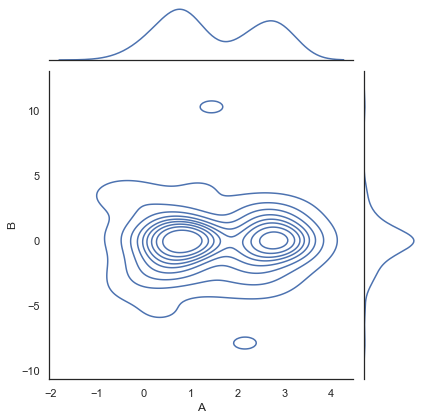

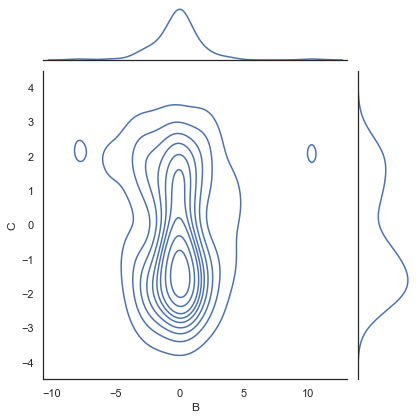

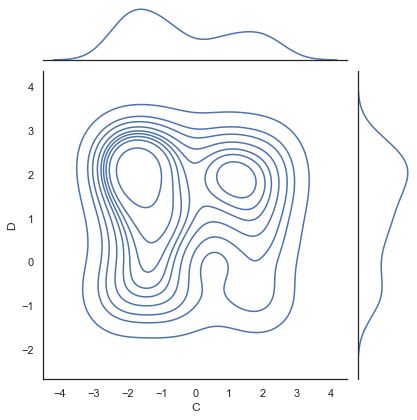

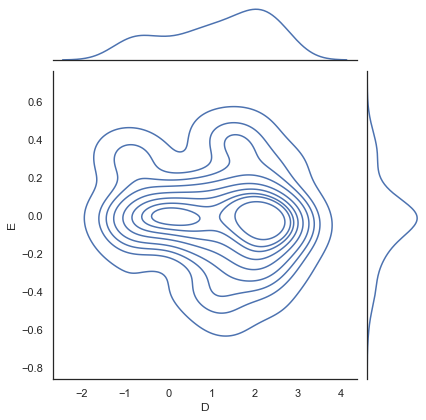

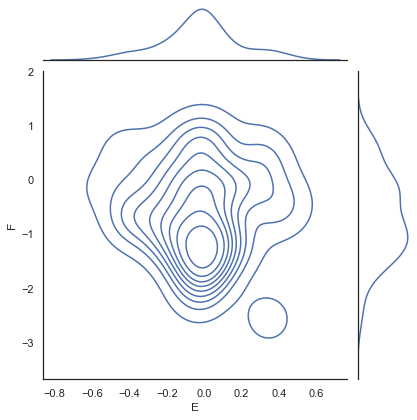

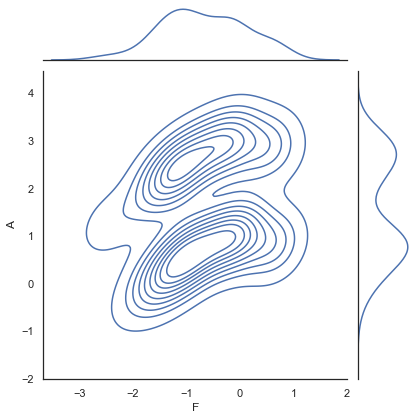

In [11]:
sns.jointplot(data={'A':A,'B':B},x='A',y='B',kind='kde');
sns.jointplot(data={'B':B,'C':C},x='B',y='C',kind='kde');
sns.jointplot(data={'C':C,'D':D},x='C',y='D',kind='kde');
sns.jointplot(data={'D':D,'E':E},x='D',y='E',kind='kde');
sns.jointplot(data={'E':E,'F':F},x='E',y='F',kind='kde');
sns.jointplot(data={'F':F,'A':A},x='F',y='A',kind='kde');

In [9]:
a_raw_r = np.round(a_raw,2)
df_raw.cov()

,A,B,C,D,E,F
A,1.109191,0.026320,0.019218,-0.049928,-0.021157,0.240156
B,0.026320,3.994748,-0.111202,0.187797,0.000958,0.002934
C,0.019218,-0.111202,2.386815,-0.003230,-0.009535,-0.019571
D,-0.049928,0.187797,-0.003230,1.370205,-0.024545,0.226815
E,-0.021157,0.000958,-0.009535,-0.024545,0.041259,-0.010216
F,0.240156,0.002934,-0.019571,0.226815,-0.010216,0.611404


In [26]:
p_values = []
for i in range(len(nodes)):
    ttest(a_raw, a_iF)

NameError: name 'a_iF' is not defined